In [109]:
import pandas as pd #used for data manipulation 
import numpy as np #math functions + allows us to manipulate matrices 

In [110]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv")

In [111]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [59]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

## ambiguous Col meanings I got after some research : 


### Basic Information:


gdp: The Gross Domestic Product, indicating the country's economic size.
### CO₂ Emissions (Various Types):


co2_including_luc: CO₂ emissions including land-use change (LUC).
co2_per_unit_energy: CO₂ emissions per unit of energy produced.
cement_co2, coal_co2, flaring_co2, gas_co2, oil_co2: CO₂ emissions from specific sectors, like cement production, coal burning, gas, and oil.
consumption_co2, consumption_co2_per_capita, consumption_co2_per_gdp: CO₂ associated with consumption.

### Cumulative CO₂ Emissions:

cumulative_co2, cumulative_cement_co2, etc.: Cumulative CO₂ emissions for each sector or type.
Greenhouse Gases (GHGs):

ghg_per_capita, total_ghg: Emissions of greenhouse gases such as methane (CH₄), nitrous oxide (N₂O), etc., including their per-capita values.
Land Use and Other Emissions:

land_use_change_co2, other_industry_co2: Emissions from land-use change and other industries.
Global Shares and Contributions:

share_global_co2, share_global_coal_co2, etc.: The country’s share of global CO₂ emissions by various sectors.
Temperature Change Contributions:


### Trade and CO₂:

trade_co2, trade_co2_share: Emissions associated with trade, possibly indicating the amount of CO₂ embedded in exported or imported goods.

In [112]:
#I want to know the possible values in aech col , especially the county one 
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")
    print()  # Add a blank line for readability

country: ['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia (GCP)' 'Asia (excl. China and India)'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Central America (GCP)' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (GCP)' 'Europe

We can see that continents are also included in the country col, which means we can use that for the visualization 

I only wanna do the analysis from 1980 and up and I want to plot the following stats : 
- Co2 emission per continent line chart since this analysis related to time 
- Differnt source of Co2 emission as a pie plot
- co2 per gpd 
- co2 per head for each continent 
- Energy Consumption vs. CO₂ Emissions
- Temperature change overall for each gas

So i will only keep the columns I actually need 

## Data pre processing 

In [113]:
# Define the columns you want to keep
columns_to_keep = [
    'country', 'year', 'co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 
    'oil_co2', 'other_industry_co2', 'co2_per_capita', 'land_use_change_co2', 
    'primary_energy_consumption', 'temperature_change_from_co2', 
    'temperature_change_from_ch4', 'temperature_change_from_n2o', 
    'temperature_change_from_ghg', 'total_ghg'
]

# Select only the specified columns
df = df[columns_to_keep]




In [114]:

df = df[df['year'] >= 1980]


In [115]:

df = df.fillna(0)


In [116]:
continents = [ 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

In [117]:
def get_continent(country):
    country = str(country).lower()  # Make sure the string is lowercase for case-insensitive matching
    for continent in continents:
        if continent.lower() in country:  # Check if the continent name is in the country string
            return continent


In [118]:
df['continent'] = df['country'].apply(get_continent)

In [71]:
df

,country,year,co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,land_use_change_co2,primary_energy_consumption,temperature_change_from_co2,temperature_change_from_ch4,temperature_change_from_n2o,temperature_change_from_ghg,total_ghg,continent
130,Afghanistan,1980,1.756,0.023,0.316,0.305,0.187,0.925,0.0,0.141,2.681,7.791,0.000,0.000,0.0,0.001,0.00,None
131,Afghanistan,1981,1.978,0.033,0.333,0.293,0.304,1.015,0.0,0.177,2.783,8.777,0.000,0.000,0.0,0.001,0.00,None
132,Afghanistan,1982,2.095,0.039,0.385,0.282,0.396,0.993,0.0,0.208,2.246,9.348,0.000,0.000,0.0,0.001,0.00,None
133,Afghanistan,1983,2.520,0.006,0.385,0.293,0.616,1.220,0.0,0.253,2.187,11.436,0.000,0.000,0.0,0.001,0.00,None
134,Afghanistan,1984,2.822,0.048,0.393,0.316,0.932,1.134,0.0,0.275,1.910,11.489,0.000,0.000,0.0,0.001,0.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,10.715,0.558,6.097,0.000,0.000,4.060,0.0,0.712,8.708,51.809,0.001,0.001,0.0,0.002,116.76,None
47411,Zimbabwe,2019,9.775,0.473,5.571,0.000,0.000,3.731,0.0,0.637,8.079,46.120,0.001,0.001,0.0,0.002,116.03,None
47412,Zimbabwe,2020,7.850,0.496,4.309,0.000,0.000,3.045,0.0,0.501,7.609,41.997,0.001,0.001,0.0,0.002,113.20,None
47413,Zimbabwe,2021,8.396,0.531,4.548,0.000,0.000,3.317,0.0,0.525,7.117,42.145,0.001,0.001,0.0,0.002,0.00,None


plot of continets co2 consumptions over year 

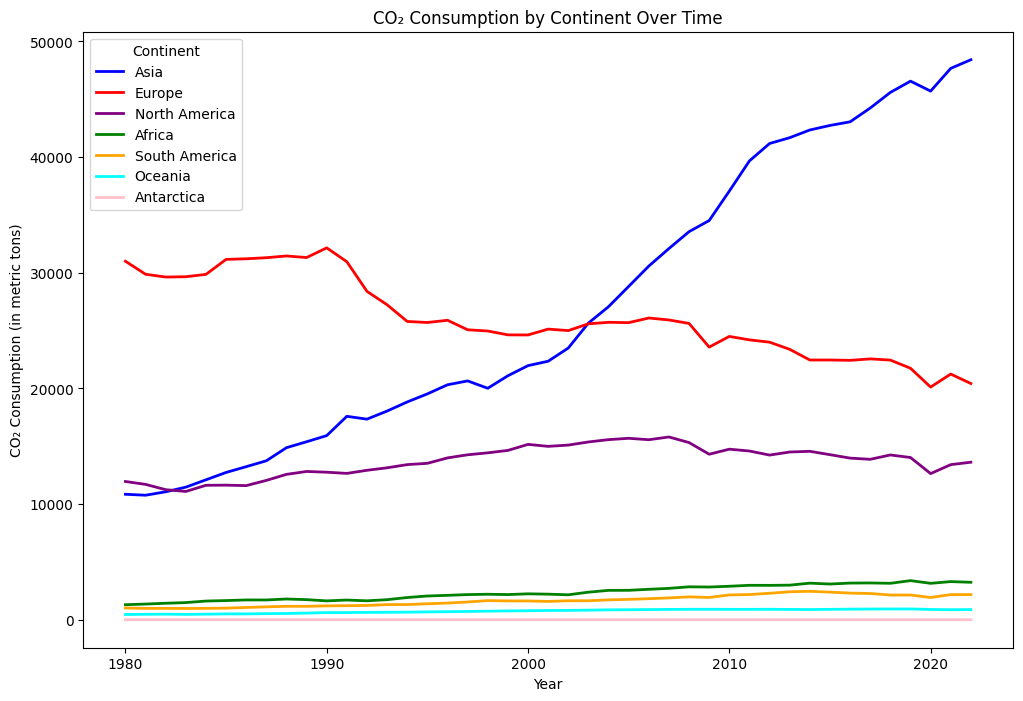

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns: 'continent', 'year', 'co2'
# Group by 'continent' and sum the CO₂ emissions across all years
continent_co2_total = df[df['continent'] != 'World'].groupby('continent')['co2'].sum().reset_index()

# Sort continents by total CO₂ emissions in descending order
continent_co2_total = continent_co2_total.sort_values(by='co2', ascending=False)

# Filter out 'World' from the main data
continent_co2 = df[df['continent'] != 'World'].groupby(['continent', 'year'])['co2'].sum().reset_index()

# Define custom colors (one for each continent)
custom_colors = {
    'Africa': 'green', 
    'Asia': 'blue', 
    'Europe': 'red', 
    'North America': 'purple', 
    'South America': 'orange', 
    'Oceania': 'cyan',
    'Antarctica': 'pink'
}

# Plotting with custom colors and sorted legend
plt.figure(figsize=(12, 8))
sns.lineplot(data=continent_co2, x='year', y='co2', hue='continent', palette=custom_colors, linewidth=2)

# Adding labels and title
plt.title("CO₂ Consumption by Continent Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Consumption (in metric tons)")

# Sort legend by the total CO₂ emissions of each continent
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: continent_co2_total[continent_co2_total['continent'] == x[1]]['co2'].values[0], reverse=True)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Apply the sorted legend to the plot
plt.legend(sorted_handles, sorted_labels, title="Continent")
plt.grid(False)

# Show the plot
plt.show()



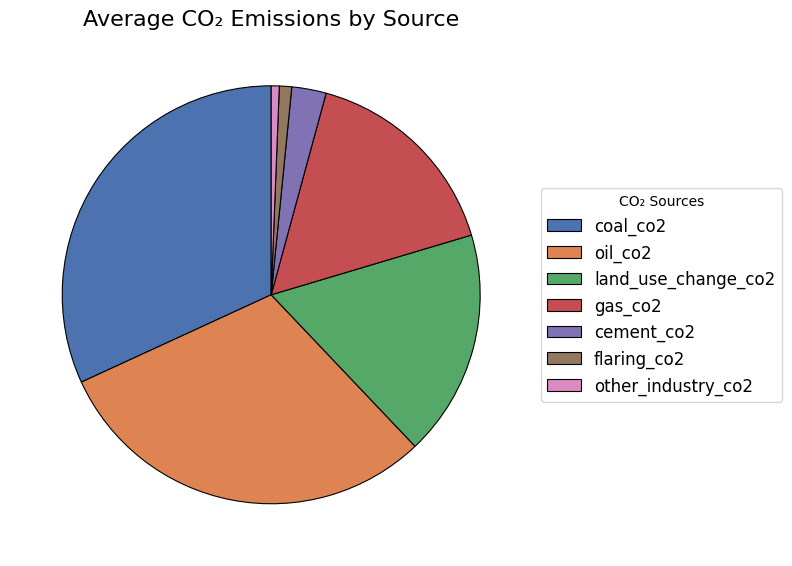

In [130]:

co2_sources = [
    'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 
    'other_industry_co2', 'land_use_change_co2'
]

# Calculate the average for each CO₂ source
avg_co2_sources = df[co2_sources].mean()

# Sort the averages in descending order
avg_co2_sources = avg_co2_sources.sort_values(ascending=False)

# Use a more professional color palette (e.g., 'muted' or 'deep')
colors = sns.color_palette("deep", len(avg_co2_sources))

# Plotting the pie chart without percentages inside and with a professional layout
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(avg_co2_sources, autopct=None, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.8})

# Adding a professional title with a larger font size
plt.title("Average CO₂ Emissions by Source", fontsize=16, weight='medium')

# Adding a neatly placed legend (key) outside the chart, sorted by largest values
plt.legend(wedges, avg_co2_sources.index, title="CO₂ Sources", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



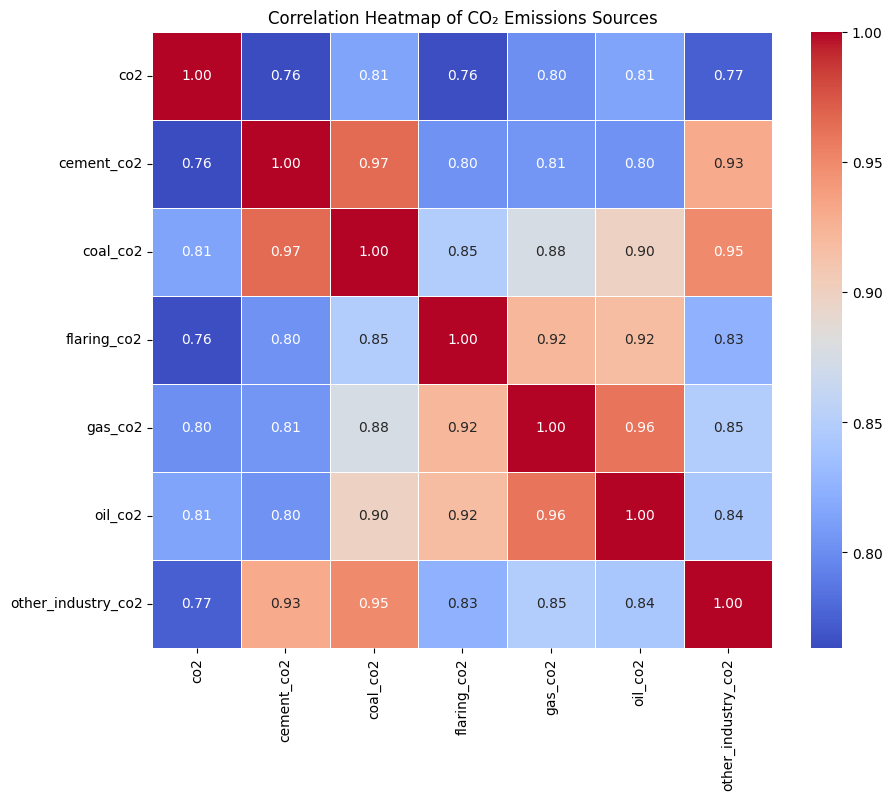

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only CO2 emission-related columns
co2_sources = df[columns_to_keep[2:9]]

# Compute correlation matrix
corr = co2_sources.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of CO₂ Emissions Sources")
plt.show()


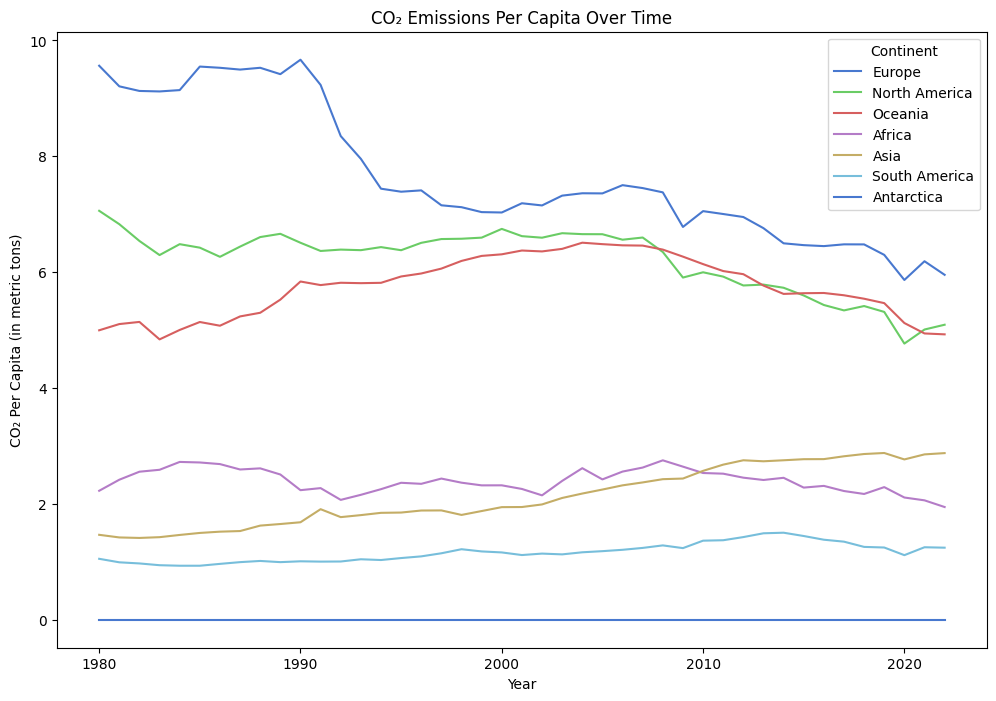

In [138]:
# Group by 'year' and 'continent' to calculate the average CO₂ per capita
avg_co2_per_year_continent = df.groupby(['year', 'continent'])['co2_per_capita'].mean().reset_index()

# Compute the average CO₂ emissions per capita by continent
avg_co2_per_capita = df.groupby('continent')['co2_per_capita'].mean().sort_values(ascending=False)

# Create a sorted list of continents based on average CO₂ emissions per capita
sorted_continents = avg_co2_per_capita.index

# Plotting CO₂ emissions per capita over time without hue
plt.figure(figsize=(12, 8))

# Use sorted continents to plot the data
for continent in sorted_continents:
    continent_data = avg_co2_per_year_continent[avg_co2_per_year_continent['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['co2_per_capita'], label=continent)

# Adding labels and title
plt.title("CO₂ Emissions Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Per Capita (in metric tons)")

# Adding legend
plt.legend(title="Continent")

# Removing grid
plt.grid(False)

# Show the plot
plt.show()




C:\Users\I7-4700\AppData\Local\Temp\ipykernel_17672\3527101943.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['year'] == 2020], x='continent', y='co2_per_capita', palette='Blues_d', ci=None)
C:\Users\I7-4700\AppData\Local\Temp\ipykernel_17672\3527101943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['year'] == 2020], x='continent', y='co2_per_capita', palette='Blues_d', ci=None)


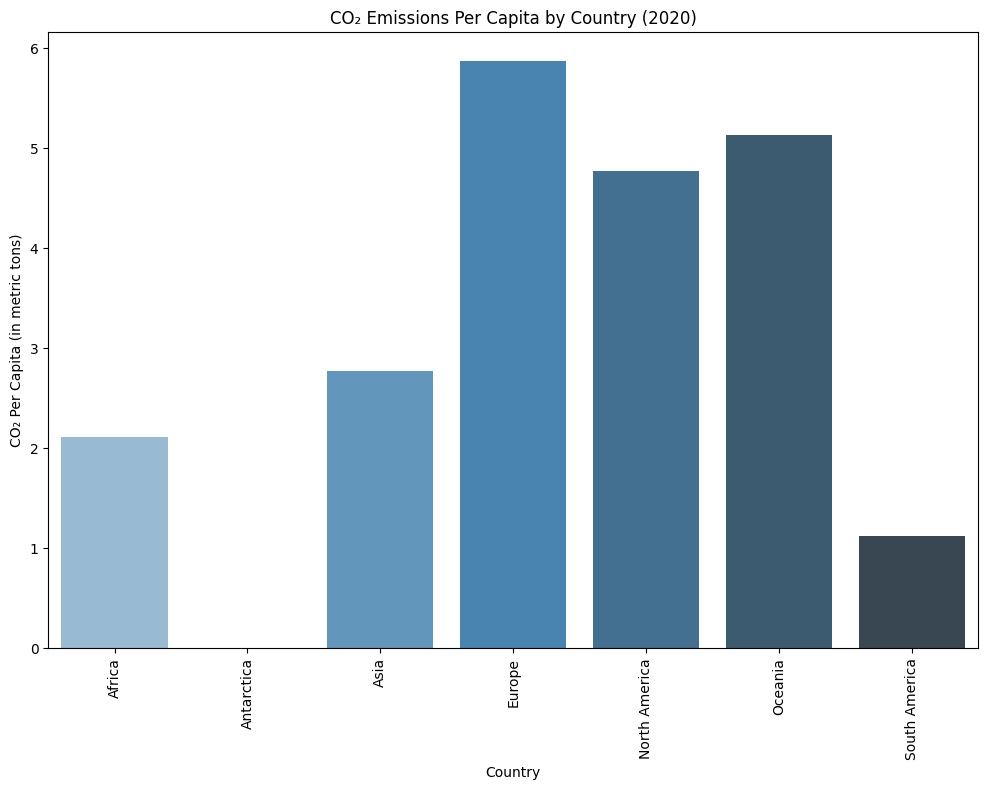

In [146]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df[df['year'] == 2020], x='continent', y='co2_per_capita', palette='Blues_d', ci=None)
plt.title("CO₂ Emissions Per Capita by Country (2020)")
plt.xlabel("Country")
plt.ylabel("CO₂ Per Capita (in metric tons)")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()


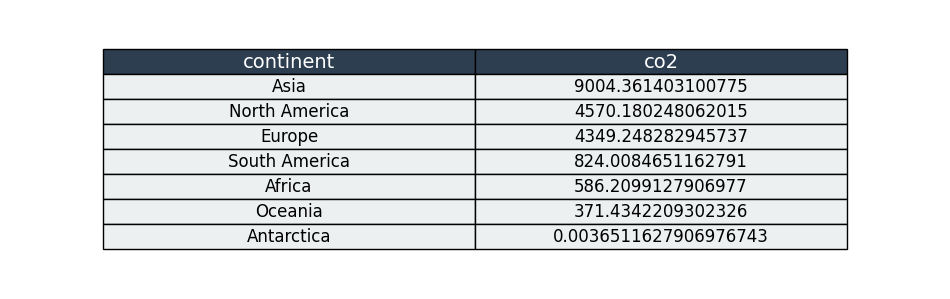

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the average CO₂ emissions per continent
avg_co2 = df.groupby('continent')['co2'].mean().reset_index()

# Step 2: Sort the table by CO₂ emissions in descending order
avg_co2_sorted = avg_co2.sort_values('co2', ascending=False)

# Step 3: Plotting the table of average CO₂ emissions per continent
plt.figure(figsize=(12, 8))

# Creating a subplot for the table
plt.subplot(2, 1, 1)  # First row, full width
plt.axis('off')  # Hide axes for table

# Plotting the table with custom styling
table = plt.table(cellText=avg_co2_sorted.values, colLabels=avg_co2_sorted.columns, cellLoc='center', loc='center')

# Styling the table to improve its appearance
table.auto_set_font_size(False)
table.set_fontsize(12)  # Increase font size
table.scale(0.8, 1.5)  # Decrease the width and increase the height of the table

# Optional: Styling the table headers
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(14)
        cell.set_text_props( color='white')
        cell.set_facecolor('#2c3e50')  # Dark color for headers
    else:
        cell.set_fontsize(12)
        cell.set_facecolor('#ecf0f1')  # Light gray background for cells




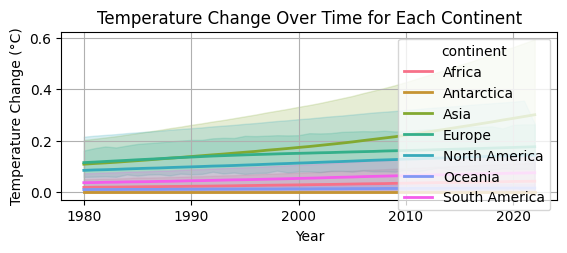

In [ ]:
# Step 3: Plotting the line chart of temperature changes over time for each continent
plt.subplot(2, 1, 2)  # Second row, full width
sns.lineplot(data=df, x='year', y='temperature_change_from_ghg', hue='continent', linewidth=2)
plt.title("Temperature Change Over Time for Each Continent")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

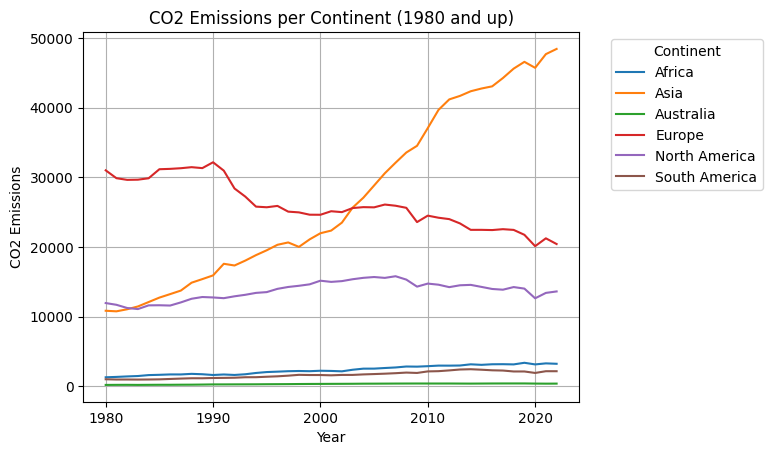

In [ ]:
import matplotlib.pyplot as plt

# Group by year and continent and sum the CO2 emissions
co2_per_continent = df.groupby(['year', 'continent'])['co2'].sum().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))
co2_per_continent.plot(kind='line')
plt.title('CO2 Emissions per Continent (1980 and up)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 2000x600 with 0 Axes>

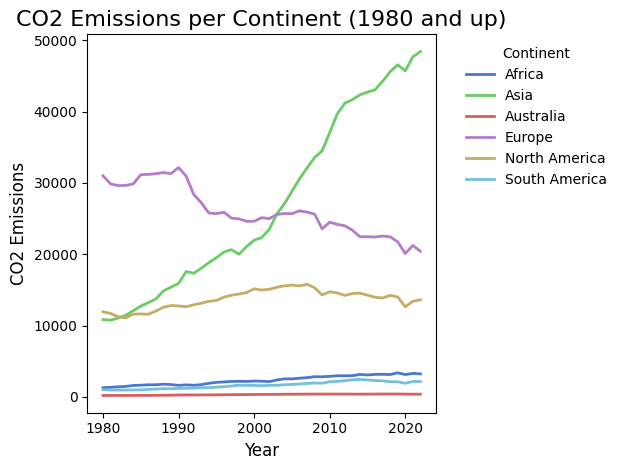

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# Set a modern style (e.g., seaborn-v0_8-muted)
matplotlib.style.use('seaborn-v0_8-muted')

# Group by year and continent and sum the CO2 emissions
co2_per_continent = df.groupby(['year', 'continent'])['co2'].sum().unstack()

# Create the plot with a wider figure (15 inches wide, 6 inches high)
plt.figure(figsize=(20, 6))  # Increase the width to 20 for a much wider plot
co2_per_continent.plot(kind='line', linewidth=2)  # Increase line width for a bolder look

# Title and labels
plt.title('CO2 Emissions per Continent (1980 and up)', fontsize=16, fontweight='medium')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)

# Remove the grid lines
plt.grid(False)

# Customize legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Adjust layout to ensure the plot is rendered properly
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()


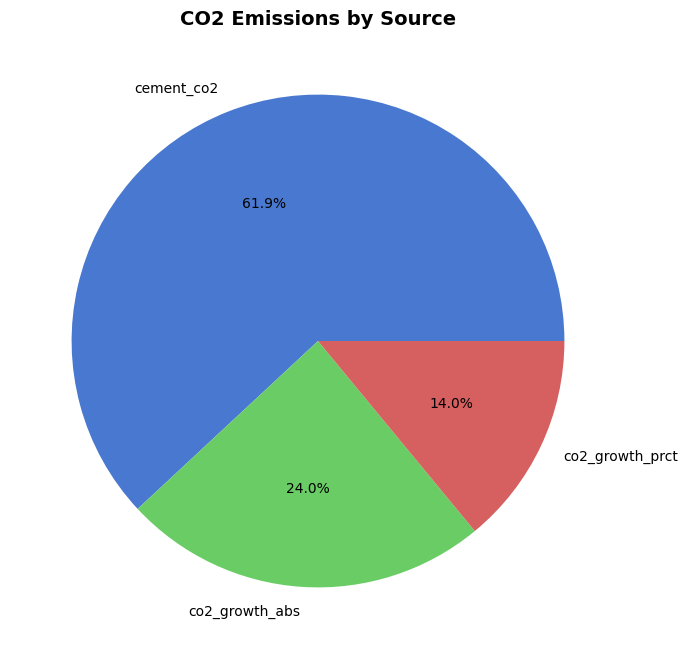

In [ ]:

# Different Sources of CO2 Emissions (Pie Chart)
co2_sources = ['cement_co2', 'co2_growth_abs', 
         'co2_growth_prct']  # Replace with actual columns if needed
co2_source_totals = df[co2_sources].sum()

# Set a modern style (e.g., seaborn-v0_8-muted)
plt.style.use('seaborn-v0_8-muted')

# Plot the pie chart
co2_source_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), legend=False)

# Title
plt.title('CO2 Emissions by Source', fontsize=14, fontweight='bold')

# Remove y-label for cleaner look
plt.ylabel('')

# Show the plot
plt.show()


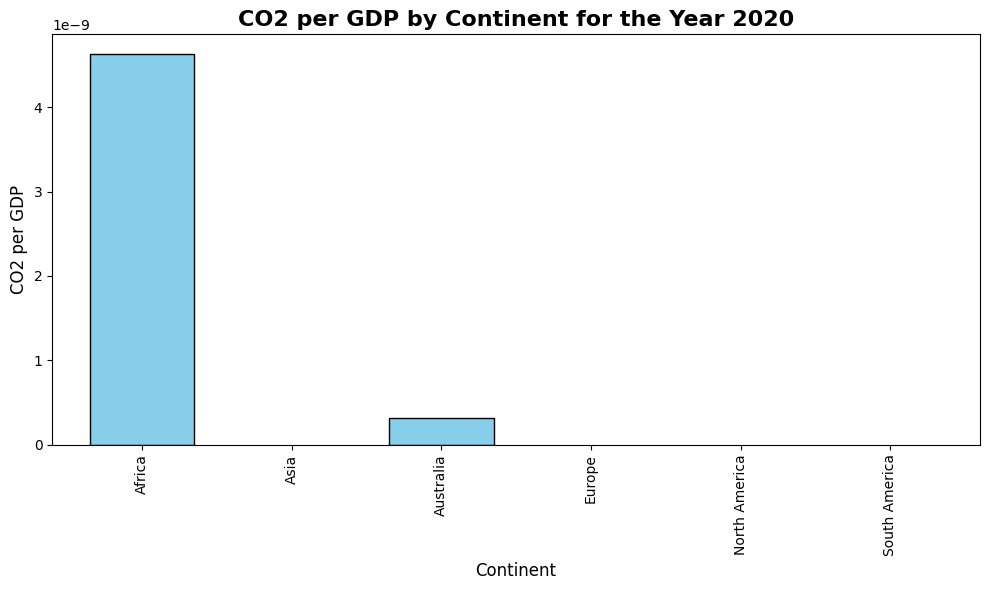

In [ ]:


# Filter data for the year 2020
df_2020 = df[df['year'] == 2020]

# Group by continent and calculate total CO2 and GDP for 2020
co2_gdp_2020 = df_2020.groupby('continent').agg({'co2': 'sum', 'gdp': 'sum'})

# Calculate CO2 per GDP for each continent
co2_gdp_2020['co2_per_gdp'] = co2_gdp_2020['co2'] / co2_gdp_2020['gdp']

# Set the plotting style
plt.style.use('seaborn-v0_8-muted')

# Plot the bar chart
plt.figure(figsize=(10, 6))
co2_gdp_2020['co2_per_gdp'].plot(kind='bar', color='skyblue', edgecolor='black', width=0.7)

# Add title and labels
plt.title('CO2 per GDP by Continent for the Year 2020', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('CO2 per GDP', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

